In [3]:
import matplotlib.pyplot as plt
import numpy as np
import json
import requests
import pandas as pd
from matplotlib import cm
import seaborn as sns
import csv


In [15]:
#DO NOT TOUCH HEADER
#Modify body to adjust query
header = {'x-functions-key': 'P8gCa4DlO122l7gQ9ICTJ/TqAua8lSUWxT4OJ783k4LonbQpcD7e4A=='}
body1 = {
    "queries": [
    {
      "datasourceId": 1,
    
      "pollutantIds": [
        1,2,3,4,5,6,7,8,9,42
      ],
      "sensorIds": [
        1
      ],
      "startDate": "20220201T08:00",
      "endDate": "20230201T07:55"
    }
  ],
  "format": "json"
}


In [16]:
data = requests.post('https://beta-awba-sensor-data-api.azurewebsites.net/api/query', json=body1, headers=header)

In [17]:
#Recieved data being converted to python list
parse_Json = json.loads(data.text)
#Selecting specifically for the JSON data that carries 
y = parse_Json['results'][0]['data'][0]['pollutantMeasurements']

In [18]:
BZdates = []
BZmeasures = []
BCdates = []
BCmeasures = []
EtBzdates = []
EtBzmeasures = []
O3dates = []
O3measures = []
P1dates = []
P1measures = []
P25dates = []
P25measures = []
P10dates = []
P10measures = []
S2dates = []
S2measures = []
TOdates = []
TOmeasures = []
PXdates = []
PXmeasures = []

In [19]:
#Passing value and date data from pollutantMeasurements to their dictionaries
for i in y:
    if i['abbreviation'] == 'Bz':
        BZdates.append(i['sampleDate'])
        BZmeasures.append(i['value'])

    elif i['abbreviation'] == 'Bc':
        BCdates.append(i['sampleDate'])
        BCmeasures.append(i['value'])

    elif i['abbreviation'] == 'EthBz':
        EtBzdates.append(i['sampleDate'])
        EtBzmeasures.append(i['value'])

    elif i['abbreviation'] == 'O3':
        O3dates.append(i['sampleDate'])
        O3measures.append(i['value'])

    elif i['abbreviation'] == 'pm1':
        P1dates.append(i['sampleDate'])
        P1measures.append(i['value'])
    
    elif i['abbreviation'] == 'pm10':
        P10dates.append(i['sampleDate'])
        P10measures.append(i['value'])

    elif i['abbreviation'] == 'pm2.5':
        P25dates.append(i['sampleDate'])
        P25measures.append(i['value'])
    
    elif i['abbreviation'] == 'SO2':
        S2dates.append(i['sampleDate'])
        S2measures.append(i['value'])
    
    elif i['abbreviation'] == 'Tol':
        TOdates.append(i['sampleDate'])
        TOmeasures.append(i['value'])
    
    elif i['abbreviation'] == 'Xyl':
        PXdates.append(i['sampleDate'])
        PXmeasures.append(i['value'])

In [20]:
df = pd.DataFrame()

In [21]:
df['Time'] = BZdates
df['BzConcentrations'] = pd.Series(BZmeasures)
df['BcConcentrations'] = pd.Series(BCmeasures)
df['EtBzConcentrations'] = pd.Series(EtBzmeasures)
df['O3Concentrations'] = pd.Series(O3measures)
df['PM1Concentrations'] = pd.Series(P1measures)
df['PM2.5Concentrations'] = pd.Series(P25measures)
df['PM10Concentrations'] = pd.Series(P10measures)
df['SO2Concentrations'] = pd.Series(S2measures)
df['ToConcentrations'] = pd.Series(TOmeasures)
df['PxConcentrations'] = pd.Series(PXmeasures)

In [24]:
len(df)

105103

In [12]:
#plt.pie(df.BzConcentrations)

In [25]:
df['DateTime'] = df['Time'].str.split('.').str[0]

df['DateTime'] = df['DateTime'].str.replace('T',' ')
df['DateTime'] = df['DateTime'].str.replace('Z','')
df['Day'] = df['DateTime'].str.split(' ').str[0]
df['Hour'] = df['DateTime'].str.split(' ').str[1]
df['Hour'] = df['Hour'].str.split(':').str[0]
df['Month'] = df['Day'].str.split('-').str[1]

df = df.drop('Time', axis=1)
df.head(25)

,BzConcentrations,BcConcentrations,EtBzConcentrations,O3Concentrations,PM1Concentrations,PM2.5Concentrations,PM10Concentrations,SO2Concentrations,ToConcentrations,PxConcentrations,DateTime,Day,Hour,Month
0,0.00,0.288,0.02,16.9,4.1,7.0,14.5,0.00,0.00,0.21,2022-02-01 00:00:00,2022-02-01,00,02
1,0.06,0.395,0.00,17.9,3.8,6.2,10.9,0.00,0.00,0.00,2022-02-01 00:05:00,2022-02-01,00,02
2,0.23,0.336,0.02,18.2,3.9,7.0,11.7,0.02,0.00,0.00,2022-02-01 00:10:00,2022-02-01,00,02
3,0.04,0.251,0.00,18.7,3.8,7.2,13.7,0.00,0.00,0.00,2022-02-01 00:15:00,2022-02-01,00,02
4,0.18,0.099,0.02,18.9,3.9,7.4,15.8,0.02,0.00,0.20,2022-02-01 00:20:00,2022-02-01,00,02
5,0.07,0.195,0.01,15.1,4.1,7.5,14.4,0.00,0.00,0.83,2022-02-01 00:25:00,2022-02-01,00,02
6,0.42,0.201,0.01,14.1,4.1,7.4,13.9,0.01,0.00,0.09,2022-02-01 00:30:00,2022-02-01,00,02
7,0.33,0.265,0.01,14.4,3.9,6.9,14.0,0.01,0.00,0.46,2022-02-01 00:35:00,2022-02-01,00,02
8,0.00,0.362,0.00,18.4,3.8,6.7,12.6,0.00,0.01,0.05,2022-02-01 00:40:00,2022-02-01,00,02
9,0.00,0.361,0.00,19.6,3.8,6.3,12.0,0.00,0.00,0.24,2022-02-01 00:45:00,2022-02-01,00,02


In [26]:
CCs = ['BzConcentrations', 'EtBzConcentrations', 'O3Concentrations', 'SO2Concentrations', 'ToConcentrations', 'PxConcentrations', 'BcConcentrations']
df[df[CCs] < 0] = np.NAN
df['BzConcentrations'].values[df['BzConcentrations'] > 0] = 1
df['EtBzConcentrations'].values[df['EtBzConcentrations'] > 0] = 1
df['SO2Concentrations'].values[df['SO2Concentrations'] > 0] = 1
df['O3Concentrations'].values[df['O3Concentrations'] < 70] = 0
df['O3Concentrations'].values[df['O3Concentrations'] >= 70] = 1
df['ToConcentrations'].values[df['ToConcentrations'] > 0] = 1
df['PxConcentrations'].values[df['PxConcentrations'] > 0] = 1
df['BcConcentrations'].values[df['BcConcentrations'] > 0] = 1
df['PM2.5Concentrations'].values[df['PM2.5Concentrations'] < 35.4] = 0
df['PM10Concentrations'].values[df['PM10Concentrations'] < 150] = 0
df['PM2.5Concentrations'].values[df['PM2.5Concentrations'] >= 35.4] = 1
df['PM10Concentrations'].values[df['PM10Concentrations'] >= 150] = 1
df['PM1Concentrations'].values[df['PM1Concentrations'] > 0] = 1
df

,BzConcentrations,BcConcentrations,EtBzConcentrations,O3Concentrations,PM1Concentrations,PM2.5Concentrations,PM10Concentrations,SO2Concentrations,ToConcentrations,PxConcentrations,DateTime,Day,Hour,Month
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2022-02-01 00:00:00,2022-02-01,00,02
1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2022-02-01 00:05:00,2022-02-01,00,02
2,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2022-02-01 00:10:00,2022-02-01,00,02
3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2022-02-01 00:15:00,2022-02-01,00,02
4,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2022-02-01 00:20:00,2022-02-01,00,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105098,1.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-31 23:35:00,2023-01-31,23,01
105099,1.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-31 23:40:00,2023-01-31,23,01
105100,1.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-31 23:45:00,2023-01-31,23,01
105101,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-31 23:50:00,2023-01-31,23,01


In [15]:
pd.set_option('display.max_rows', 10)
df.head(10)

,BzConcentrations,BcConcentrations,EtBzConcentrations,O3Concentrations,PM1Concentrations,PM2.5Concentrations,PM10Concentrations,SO2Concentrations,ToConcentrations,PxConcentrations,DateTime,Day,Hour,Month
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2022-02-01 00:00:00,2022-02-01,00,02
1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2022-02-01 00:05:00,2022-02-01,00,02
2,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2022-02-01 00:10:00,2022-02-01,00,02
3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2022-02-01 00:15:00,2022-02-01,00,02
4,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2022-02-01 00:20:00,2022-02-01,00,02
5,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2022-02-01 00:25:00,2022-02-01,00,02
6,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2022-02-01 00:30:00,2022-02-01,00,02
7,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2022-02-01 00:35:00,2022-02-01,00,02
8,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,2022-02-01 00:40:00,2022-02-01,00,02
9,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2022-02-01 00:45:00,2022-02-01,00,02


In [34]:
df.index = pd.to_datetime(df['DateTime'])
df

,BzConcentrations,BcConcentrations,EtBzConcentrations,O3Concentrations,PM1Concentrations,PM2.5Concentrations,PM10Concentrations,SO2Concentrations,ToConcentrations,PxConcentrations,DateTime,Day,Hour,Month
DateTime,,,,,,,,,,,,,,
2022-02-01 00:00:00,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2022-02-01 00:00:00,2022-02-01,00,02
2022-02-01 00:05:00,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2022-02-01 00:05:00,2022-02-01,00,02
2022-02-01 00:10:00,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2022-02-01 00:10:00,2022-02-01,00,02
2022-02-01 00:15:00,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2022-02-01 00:15:00,2022-02-01,00,02
2022-02-01 00:20:00,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2022-02-01 00:20:00,2022-02-01,00,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-31 23:35:00,1.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-31 23:35:00,2023-01-31,23,01
2023-01-31 23:40:00,1.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-31 23:40:00,2023-01-31,23,01
2023-01-31 23:45:00,1.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-31 23:45:00,2023-01-31,23,01


In [35]:
fb = (df.index > '2022-02-01 00:00:00') & (df.index <= '2022-02-28 11:55:00')
mr = (df.index > '2022-03-01 00:00:00') & (df.index <= '2022-03-31 11:55:00')
ap= (df.index > '2022-04-01 00:00:00') & (df.index <= '2022-04-30 11:55:00')
my = (df.index > '2022-05-01 00:00:00') & (df.index <= '2022-05-31 11:55:00')
jn = (df.index > '2022-06-01 00:00:00') & (df.index <= '2022-06-30 11:55:00')
jl = (df.index > '2022-07-01 00:00:00') & (df.index <= '2022-07-31 11:55:00')
ag = (df.index > '2022-08-01 00:00:00') & (df.index <= '2022-08-31 11:55:00')
st = (df.index > '2022-09-01 00:00:00') & (df.index <= '2022-09-30 11:55:00')
ot = (df.index > '2022-10-01 00:00:00') & (df.index <= '2022-10-31 11:55:00')
nv = (df.index > '2022-11-01 00:00:00') & (df.index <= '2022-11-30 11:55:00')
dc = (df.index > '2022-12-01 00:00:00') & (df.index <= '2022-12-31 11:55:00')
ja = (df.index > '2023-01-01 00:00:00') & (df.index <= '2023-01-31 11:55:00')

In [36]:
Feb = df.loc[fb]
Mar = df.loc[mr]
Apr = df.loc[ap]
May = df.loc[my]
Jun = df.loc[jn]
Jul = df.loc[jl]
Aug = df.loc[ag]
Sep = df.loc[st]
Oct = df.loc[ot]
Nov = df.loc[nv]
Dec = df.loc[dc]
Jan = df.loc[ja]
Feb

,BzConcentrations,BcConcentrations,EtBzConcentrations,O3Concentrations,PM1Concentrations,PM2.5Concentrations,PM10Concentrations,SO2Concentrations,ToConcentrations,PxConcentrations,DateTime,Day,Hour,Month
DateTime,,,,,,,,,,,,,,
2022-02-01 00:05:00,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2022-02-01 00:05:00,2022-02-01,00,02
2022-02-01 00:10:00,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2022-02-01 00:10:00,2022-02-01,00,02
2022-02-01 00:15:00,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2022-02-01 00:15:00,2022-02-01,00,02
2022-02-01 00:20:00,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2022-02-01 00:20:00,2022-02-01,00,02
2022-02-01 00:25:00,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2022-02-01 00:25:00,2022-02-01,00,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-28 11:35:00,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2022-02-28 11:35:00,2022-02-28,11,02
2022-02-28 11:40:00,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2022-02-28 11:40:00,2022-02-28,11,02
2022-02-28 11:45:00,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2022-02-28 11:45:00,2022-02-28,11,02


In [103]:
Sdf = pd.DataFrame()

In [106]:
Jan

,BzConcentrations,BcConcentrations,EtBzConcentrations,O3Concentrations,PM1Concentrations,PM2.5Concentrations,PM10Concentrations,SO2Concentrations,ToConcentrations,PxConcentrations,...,Bz,EtBz,S2,To,Px,Bc,O3,P25,P1,P10
DateTime,,,,,,,,,,,,,,,,,,,,,
2023-01-01 00:05:00,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-01 00:10:00,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-01 00:15:00,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-01 00:20:00,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-01 00:25:00,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-31 11:35:00,1.0,1.0,0.0,0.0,NaN,NaN,NaN,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-31 11:40:00,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-31 11:45:00,0.0,1.0,1.0,0.0,NaN,NaN,NaN,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:

Sdf['Bz'] = Jan['BzConcentrations'].value_counts()
Sdf['EtBz'] = Jan['EtBzConcentrations'].value_counts()
Sdf['S2'] = Jan['SO2Concentrations'].value_counts()
Sdf['To'] = Jan['ToConcentrations'].value_counts()
Sdf['Px'] = Jan['PxConcentrations'].value_counts()
Sdf['Bc'] = Jan['BcConcentrations'].value_counts()
Sdf['O3'] =Jan['O3Concentrations'].value_counts()
Sdf['P25'] = Jan['PM2.5Concentrations'].value_counts()
Sdf['P1'] = Jan['PM1Concentrations'].value_counts()
Sdf['P10'] = Jan['PM10Concentrations'].value_counts()
#print(Sdf.iloc[0].sum())


In [105]:
Sdf

,Bz,EtBz,S2,To,Px,Bc,O3,P25,P1,P10
1.0,6689,5542,6578,5485,6614,8547,NaN,NaN,496.0,NaN
0.0,1582,2729,1694,2787,1658,236,8773.0,496.0,NaN,496.0


In [18]:
Sdf = Sdf.append(Sdf.sum(axis=0), ignore_index=True)
Sdf


C:\Users\kanel\AppData\Local\Temp/ipykernel_16520/4092971821.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Sdf = Sdf.append(Sdf.sum(axis=0), ignore_index=True)


,Bz,EtBz,S2,To,Px,Bc,O3,P25,P1,P10
0,5961.0,5047.0,3183.0,1515.0,5994.0,7717.0,NaN,7.0,8064.0,1.0
1,1594.0,2508.0,4372.0,6040.0,1561.0,347.0,8060.0,8057.0,NaN,8063.0
2,7555.0,7555.0,7555.0,7555.0,7555.0,8064.0,8060.0,8064.0,8064.0,8064.0


In [19]:
Sdf.rename( index={0 :'Detections', 1 :'Not_Detected', 2 :'Total'}, inplace=True )
Sdf

,Bz,EtBz,S2,To,Px,Bc,O3,P25,P1,P10
Detections,5961.0,5047.0,3183.0,1515.0,5994.0,7717.0,NaN,7.0,8064.0,1.0
Not_Detected,1594.0,2508.0,4372.0,6040.0,1561.0,347.0,8060.0,8057.0,NaN,8063.0
Total,7555.0,7555.0,7555.0,7555.0,7555.0,8064.0,8060.0,8064.0,8064.0,8064.0


In [20]:
Pdf = Sdf
Pdf = Pdf.drop('Not_Detected', axis=0)
Pdf

,Bz,EtBz,S2,To,Px,Bc,O3,P25,P1,P10
Detections,5961.0,5047.0,3183.0,1515.0,5994.0,7717.0,NaN,7.0,8064.0,1.0
Total,7555.0,7555.0,7555.0,7555.0,7555.0,8064.0,8060.0,8064.0,8064.0,8064.0


In [21]:
Pdf.loc['Pct'] = ((Pdf.loc['Detections']/ Pdf.loc['Total']))
Pdf

,Bz,EtBz,S2,To,Px,Bc,O3,P25,P1,P10
Detections,5961.000000,5047.000000,3183.00000,1515.000000,5994.000000,7717.000000,NaN,7.000000,8064.0,1.000000
Total,7555.000000,7555.000000,7555.00000,7555.000000,7555.000000,8064.000000,8060.0,8064.000000,8064.0,8064.000000
Pct,0.789014,0.668034,0.42131,0.200529,0.793382,0.956969,NaN,0.000868,1.0,0.000124


Text(0.5, 1.0, 'January 2023')

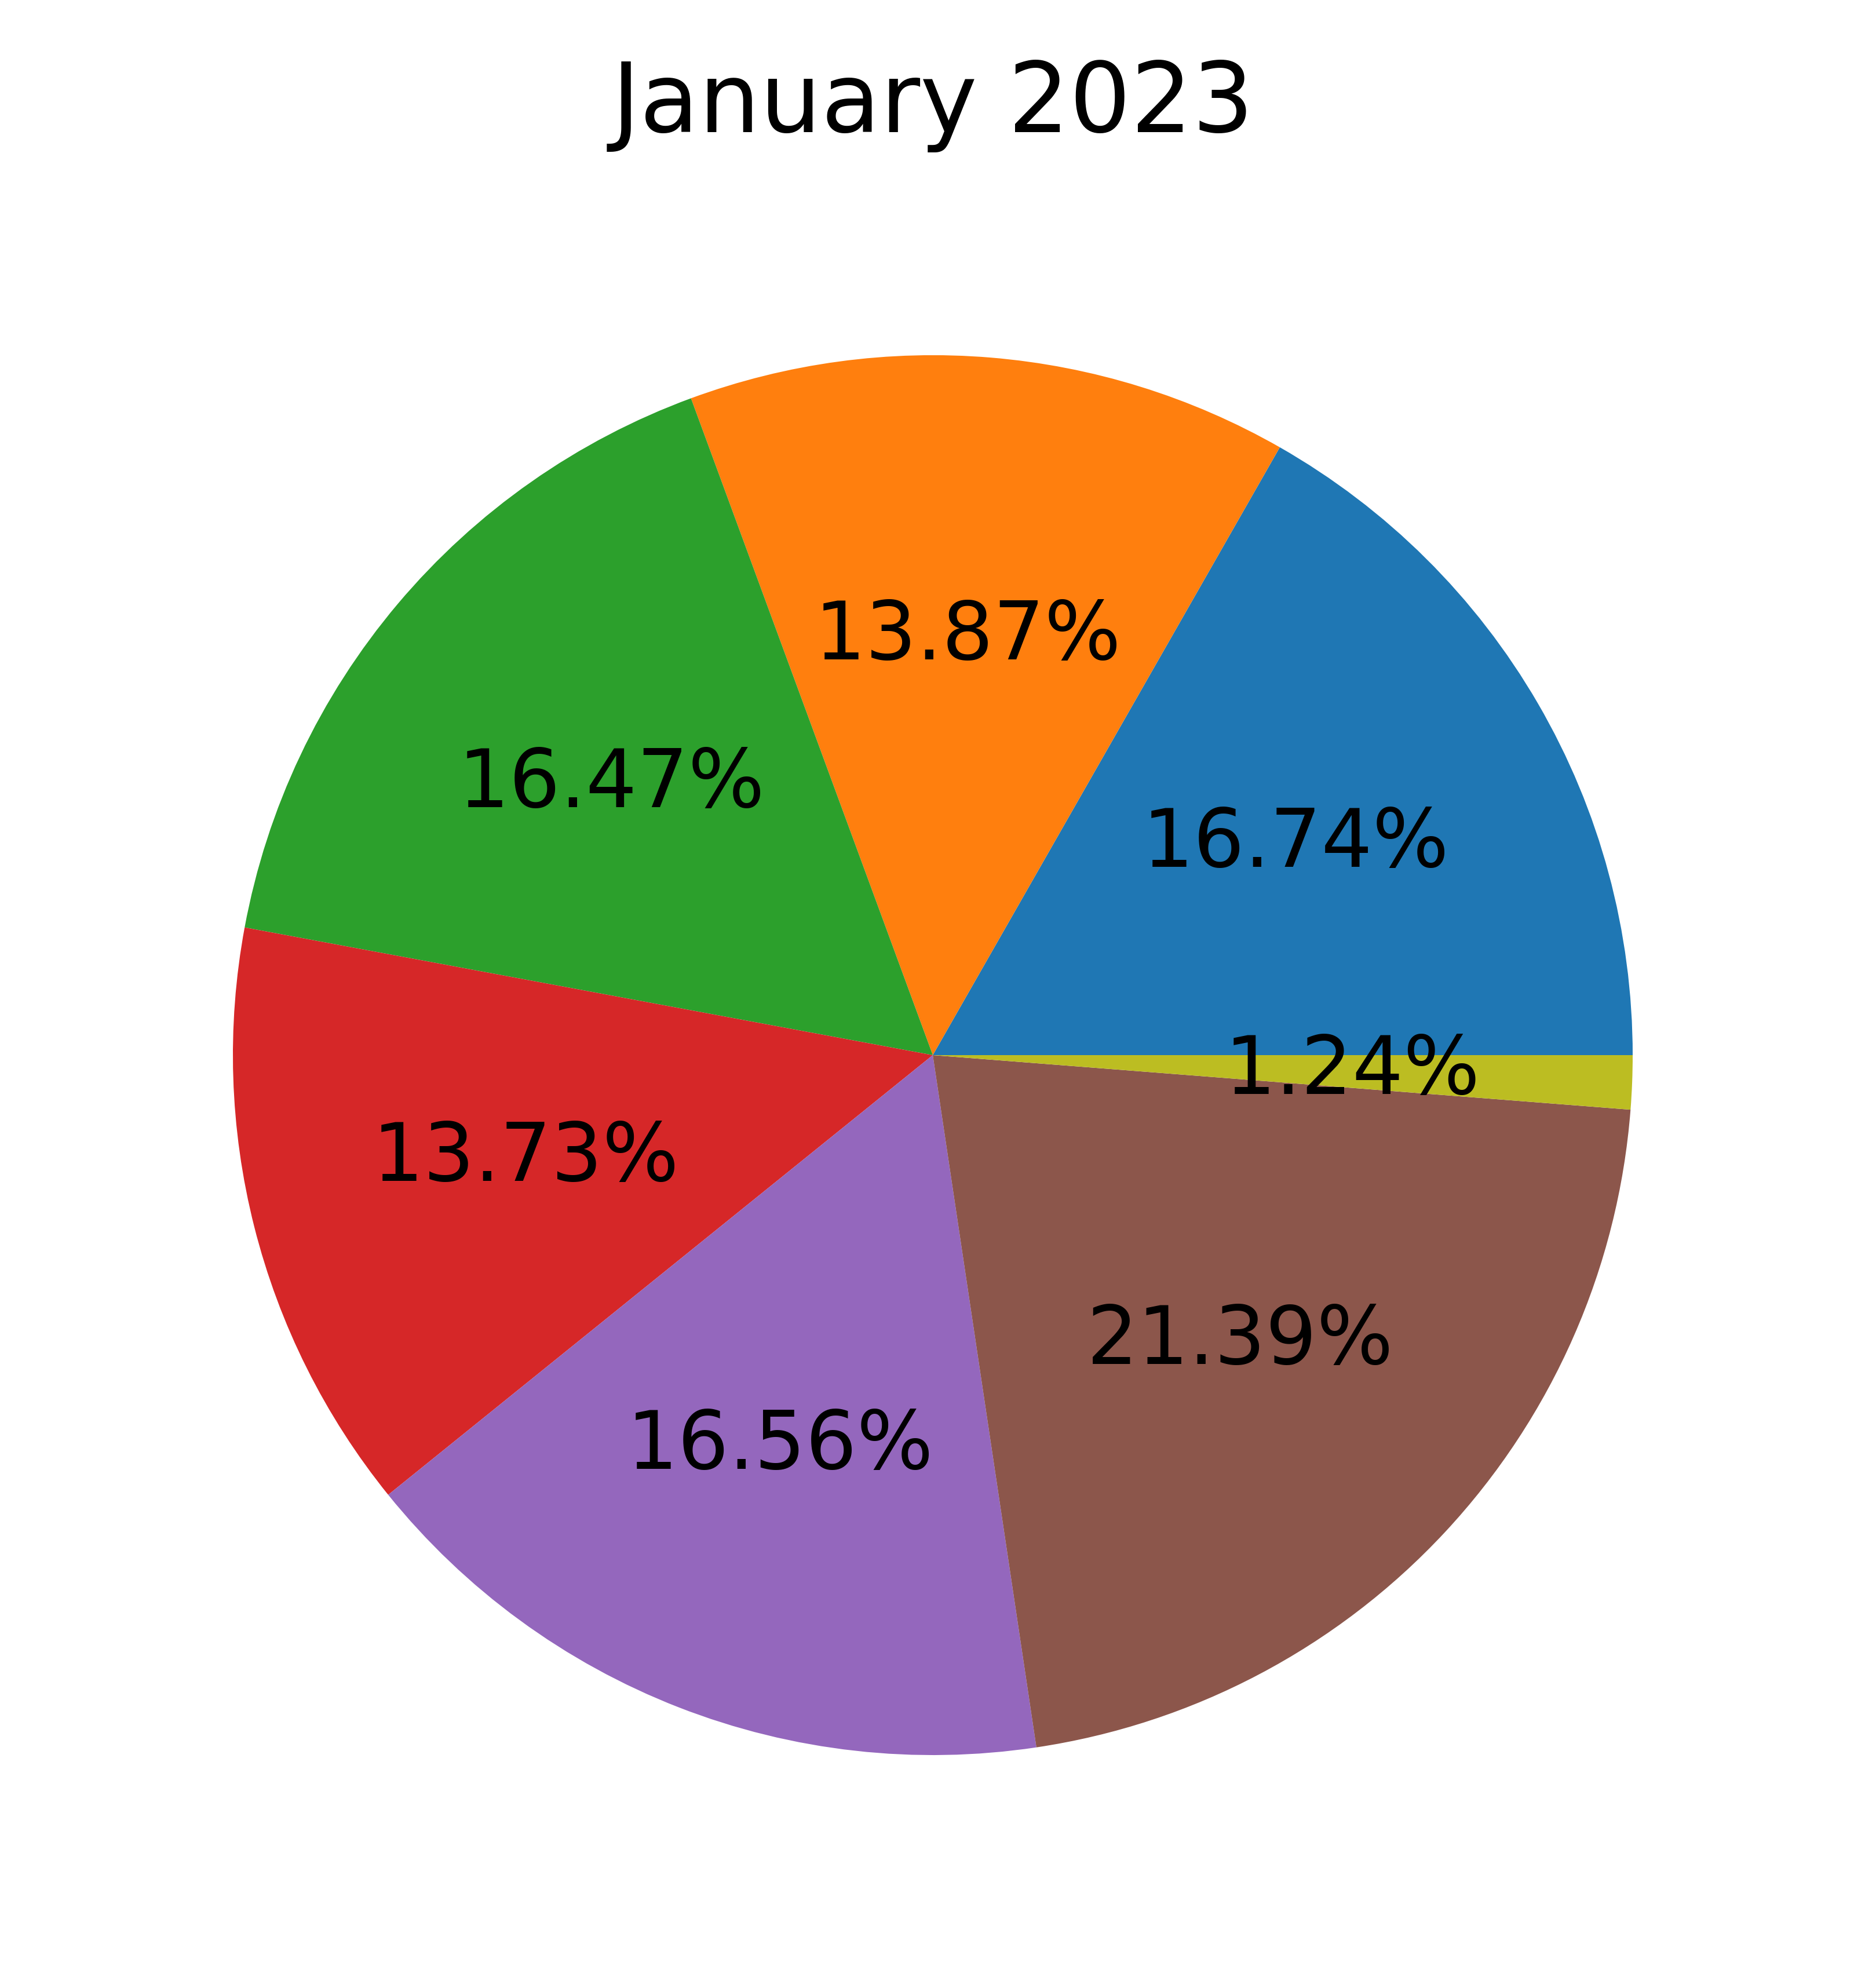

In [107]:
labs = ['Bz','EtBz','S2','To','Px','Bc','O3','PM2.5','PM1','PM10']
plt.rcParams['figure.dpi'] = 1000
Sdf.iloc[0].plot.pie(ylabel='', autopct=lambda p : '{:.2f}%'.format(p,p * sum(Sdf.iloc[0])/100) if p > 1 else '', labels=None)
plt.title('January 2023')
#plt.legend(labels= labs,bbox_to_anchor= (1,1,0,0))